In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../DataSets/Data-science-job-salaries'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Data-science-job-salaries\ds_salaries.csv


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [84]:
df = pd.read_csv('DataSets/Data-science-job-salaries/ds_salaries.csv', index_col = 0)

In [85]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [86]:
df.shape

(607, 11)

In [87]:
df['salary_in_usd'] = (df['salary_in_usd'] / 12).astype('int32')

In [88]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,6652,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,21666,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,9085,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,1666,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,12500,US,50,US,L


In [89]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [90]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,9357.779242,70.92257
std,0.692133,1.544357e+06,5913.160617,40.70913
min,2020.000000,4.000000e+03,238.000000,0.00000
25%,2021.000000,7.000000e+04,5227.000000,50.00000
50%,2022.000000,1.150000e+05,8464.000000,100.00000
75%,2022.000000,1.650000e+05,12500.000000,100.00000
max,2022.000000,3.040000e+07,50000.000000,100.00000


In [91]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,6652,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,21666,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,9085,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,1666,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,12500,US,50,US,L


In [92]:
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [93]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [94]:
df['job_title'] = df['job_title'].replace('Finance Data Analyst','Financial Data Analyst')

In [95]:
analyst = df[df['job_title'].str.contains('Data Analyst')]

In [96]:
analyst['job_title'].value_counts()

Data Analyst              97
BI Data Analyst            6
Business Data Analyst      5
Lead Data Analyst          3
Financial Data Analyst     3
Product Data Analyst       2
Principal Data Analyst     2
Marketing Data Analyst     1
Name: job_title, dtype: int64

In [97]:
analyst.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,119.000000,1.190000e+02,119.000000,119.000000
mean,2021.537815,2.155458e+05,7766.336134,76.050420
std,0.686306,1.013879e+06,4448.675073,40.046974
min,2020.000000,8.000000e+03,506.000000,0.000000
25%,2021.000000,6.165000e+04,5054.000000,50.000000
50%,2022.000000,9.370000e+04,7526.000000,100.000000
75%,2022.000000,1.276875e+05,9672.500000,100.000000
max,2022.000000,1.100000e+07,37500.000000,100.000000


In [98]:
analyst_remote = analyst['remote_ratio'].value_counts()

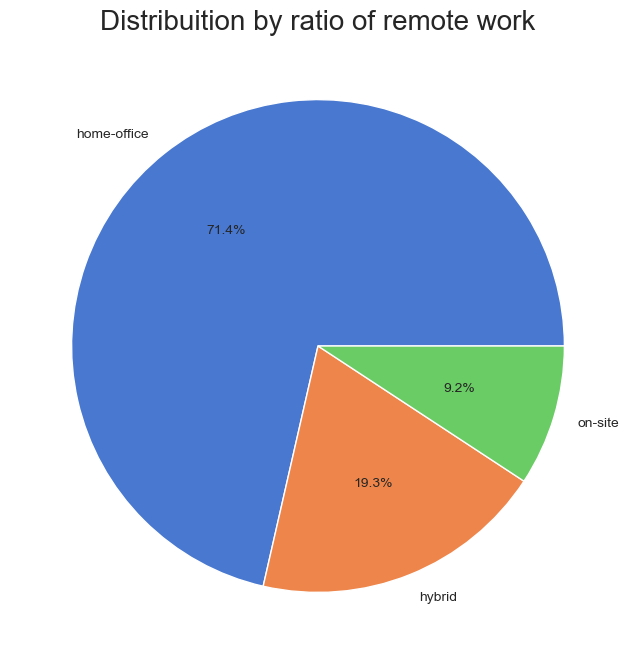

In [99]:
analyst_remote = analyst['remote_ratio'].value_counts()
labels = ['home-office','hybrid','on-site']
pie_remote = analyst_remote.plot.pie(labels=labels,colors= sns.color_palette('muted'),autopct='%1.1f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Distribuition by ratio of remote work',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Distribuition by ratio of remote work and Year')

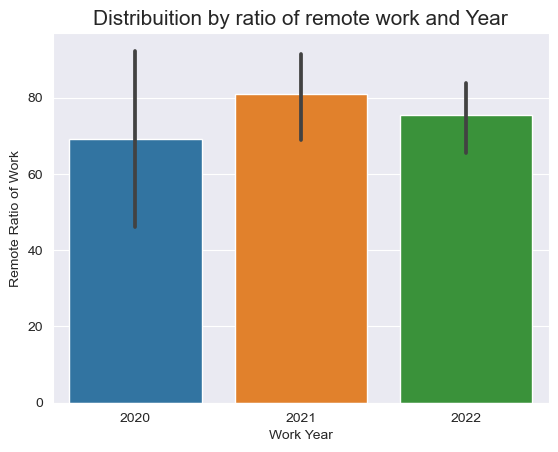

In [100]:
sns.barplot(x='work_year', y='remote_ratio', data=analyst)
plt.ylabel('Remote Ratio of Work')
plt.xlabel('Work Year')
plt.title('Distribuition by ratio of remote work and Year',fontsize=15)

In [101]:
df.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [102]:
my_data=df[df['job_title'].str.contains('Machine Learning')]

In [103]:
my_data.job_title.value_counts()

Machine Learning Engineer                   41
Machine Learning Scientist                   8
Applied Machine Learning Scientist           4
Machine Learning Infrastructure Engineer     3
Machine Learning Developer                   3
Machine Learning Manager                     1
Head of Machine Learning                     1
Lead Machine Learning Engineer               1
Name: job_title, dtype: int64

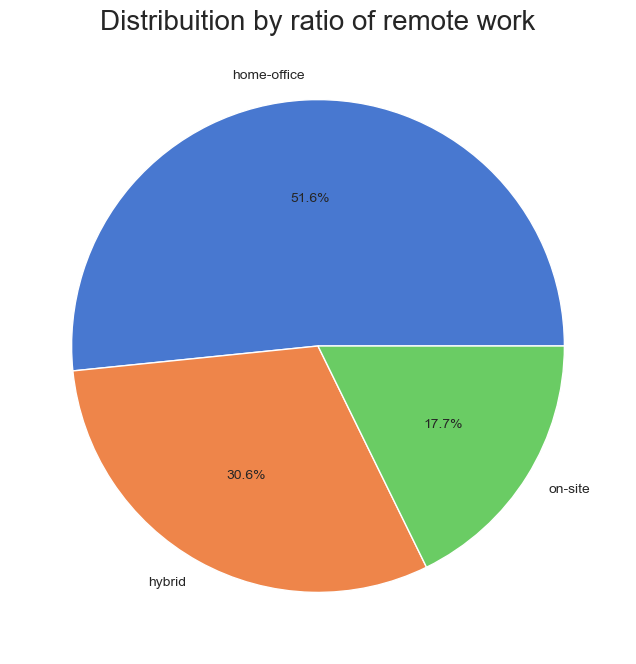

In [104]:
analyst_remote=my_data['remote_ratio'].value_counts()
labels = ['home-office','hybrid','on-site']
pie_remote = analyst_remote.plot.pie(labels=labels,colors= sns.color_palette('muted'),autopct='%1.1f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Distribuition by ratio of remote work',fontsize=20)
plt.show()

In [105]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

<Figure size 1200x1000 with 0 Axes>

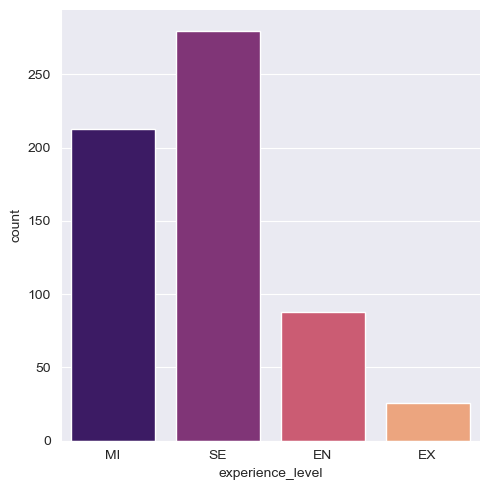

In [106]:
plt.figure(figsize=(12,10))
sns.catplot(x='experience_level',data = df,kind = 'count',palette = 'magma')
plt.show()

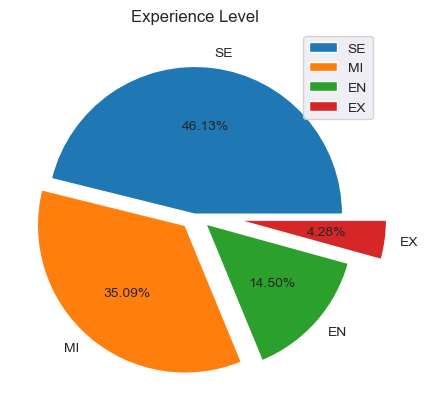

In [107]:
levels = df.experience_level.value_counts()
levels
explode = [0,0.1,0.1, 0.3]
plt.pie(x = levels.values,labels =levels.index,autopct='%1.2f%%',explode = explode)
plt.title('Experience Level')
plt.legend()
plt.show()

In [108]:
levels

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [109]:
min, max = analyst.salary_in_usd.quantile([0.15,0.985])
analyst_n_out=analyst[(analyst.salary_in_usd>min) & (analyst.salary_in_usd<max)]

Text(0.5, 1.0, 'Mean of Monthly Salary by Year')

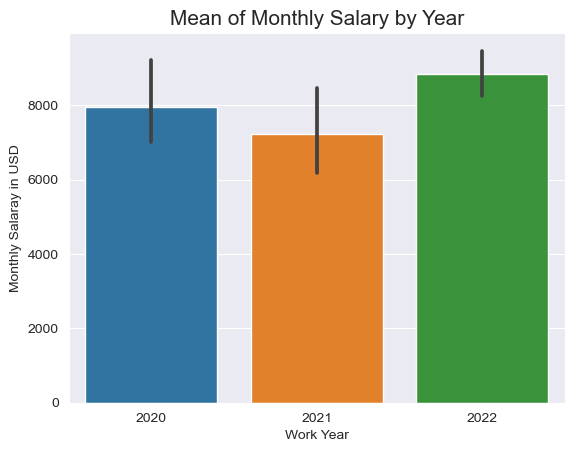

In [110]:
sns.barplot(x='work_year', y='salary_in_usd', data=analyst_n_out)
plt.ylabel('Monthly Salaray in USD')
plt.xlabel('Work Year')
plt.title('Mean of Monthly Salary by Year',fontsize=15)

Text(0.5, 0, 'Monthly Salaray in USD')

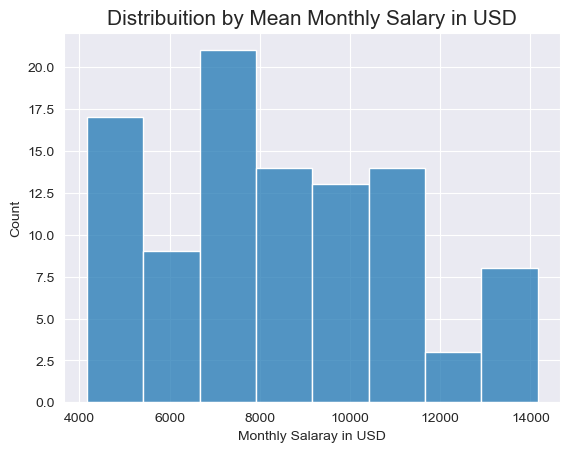

In [111]:
sns.histplot(analyst_n_out['salary_in_usd'])
plt.title('Distribuition by Mean Monthly Salary in USD',fontsize=15)
plt.xlabel('Monthly Salaray in USD')

In [112]:
analyst_n_out

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2020,EN,FT,Data Analyst,72000,USD,6000,US,100,US,L
8,2020,MI,FT,Business Data Analyst,135000,USD,11250,US,100,US,L
13,2020,MI,FT,Lead Data Analyst,87000,USD,7250,US,100,US,L
14,2020,MI,FT,Data Analyst,85000,USD,7083,US,100,US,L
23,2020,MI,FT,BI Data Analyst,98000,USD,8166,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
597,2022,SE,FT,Data Analyst,170000,USD,14166,US,100,US,M
600,2022,EN,FT,Data Analyst,67000,USD,5583,CA,0,CA,M
601,2022,EN,FT,Data Analyst,52000,USD,4333,CA,0,CA,M
604,2022,SE,FT,Data Analyst,129000,USD,10750,US,0,US,M


Text(0.5, 1.0, 'Mean Monthly Salary in USD by Job Title')

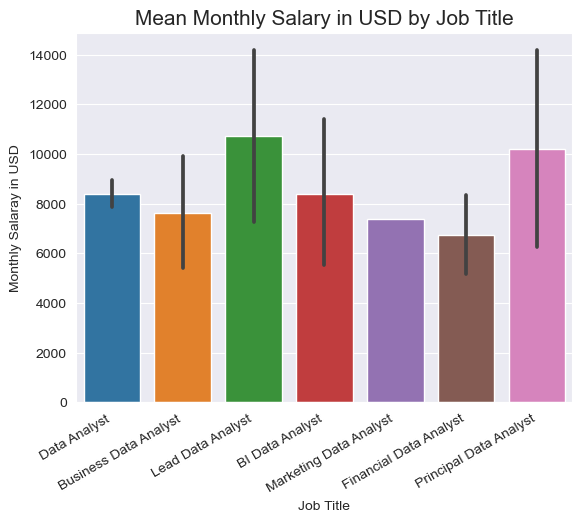

In [113]:
ax=sns.barplot(x='job_title', y='salary_in_usd', data=analyst_n_out)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Monthly Salaray in USD')
plt.xlabel('Job Title')
plt.title('Mean Monthly Salary in USD by Job Title',fontsize=15)

Text(0.5, 1.0, 'Mean Monthly Salary in USD by Job Title')

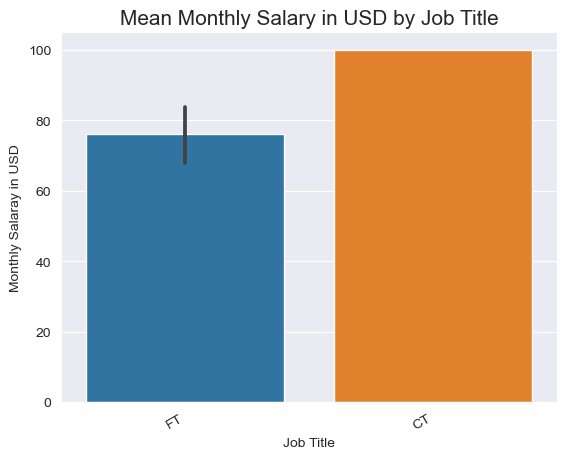

In [114]:
ax=sns.barplot(x='employment_type', y='remote_ratio', data=analyst_n_out)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Monthly Salaray in USD')
plt.xlabel('Job Title')
plt.title('Mean Monthly Salary in USD by Job Title',fontsize=15)